In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk

file_path = 'spam.csv'

df = pd.read_csv(file_path, encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.duplicated().sum()

403

In [3]:
df = df.drop(columns=["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"	])
df = df.rename(columns={"v1": "Is spam" , "v2" : "text"})
df.drop_duplicates(keep = 'first' , inplace = True)
df

,Is spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.duplicated().sum()

0

In [5]:
df["Is spam"] = df["Is spam"].replace("spam", "1").replace("ham", "0")
df['Is spam'] = df['Is spam'].astype(int)

df

,Is spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
df['Is spam'].value_counts()

Is spam
0    4516
1     653
Name: count, dtype: int64

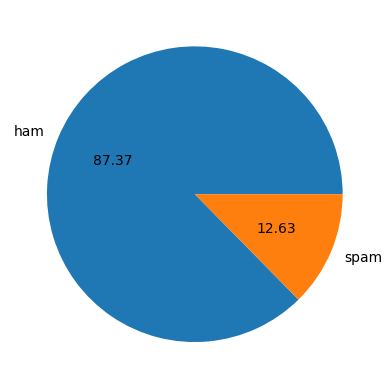

In [7]:
plt.pie(df['Is spam'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [8]:
nltk.download('punkt')
df['num_character']=df['text'].apply(len)
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)
df.describe()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Is spam,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


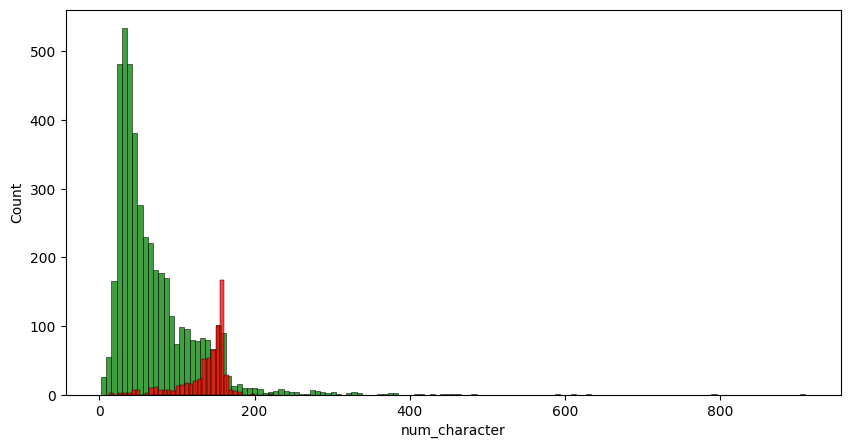

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Is spam']==0]['num_character'], color = 'green')
sns.histplot(df[df['Is spam']==1]['num_character'] , color = 'red')
plt.show()

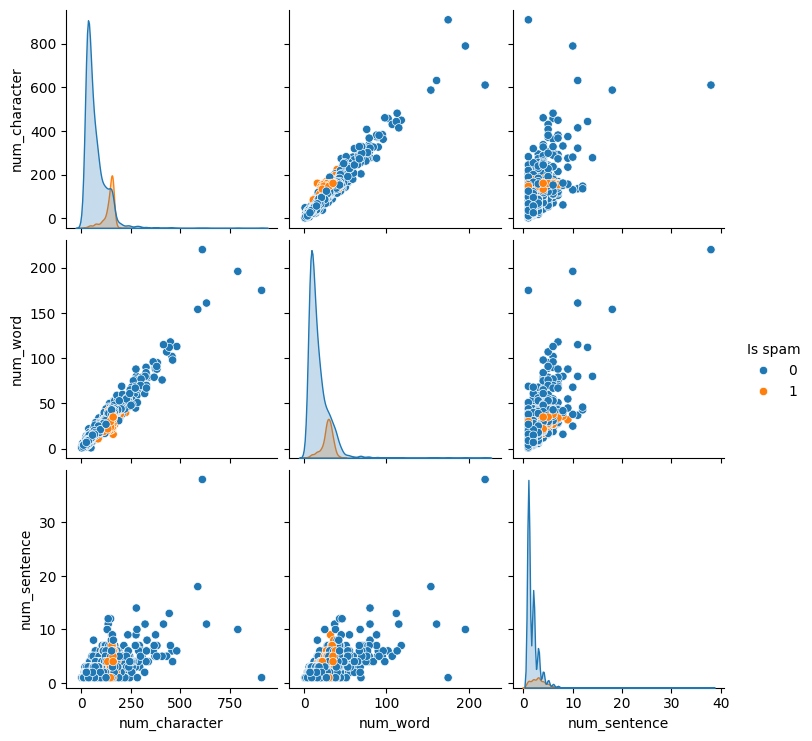

In [10]:
sns.pairplot(df,hue= ('Is spam'))
plt.show()

<Axes: >

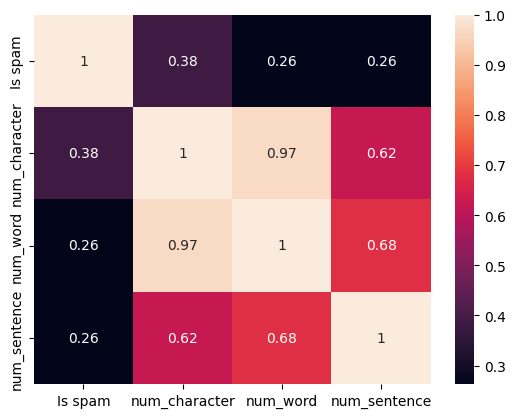

In [11]:
#to see correlation matrix 
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

In [12]:
from nltk.stem import PorterStemmer
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def transform_texto(text):
    text = ' '.join([stemmer.stem(word) for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words])
    lemmatized_words = [token.lemma_ for token in nlp(text)]
    return ' '.join(lemmatized_words)

df['transform_text'] = df['text'].apply(transform_texto)

print(transform_texto("Reda is dancing  ate a good man !  okay ? \n [ à  33 ans] "))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


reda danc eat good man okay à 33 an


In [13]:
df

,Is spam,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [14]:
spam_corpus = []
for msg in df[df['Is spam'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'late',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw1a

In [15]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(100))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
...,...,...
95,good,19
96,8007,19
97,pic,19
98,credit,18


Samething to spam_ham_dataset.csv

In [16]:
df2 = pd.read_csv('spam_ham_dataset.csv')
df2

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [17]:
df2 = df2.drop(columns= ["Unnamed: 0", "label"])
df2 = df2.rename(columns={"label_num": "Is spam" , "text" : "transform_text"})
df2["Is spam"] = df2['Is spam'].astype(int)
df2

,transform_text,Is spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [18]:
df2['transform_text'] = df2["transform_text"].apply(lambda x: str(x).split("Subject:")[1].strip() if "Subject:" in str(x) else str(x))
df2

,transform_text,Is spam
0,enron methanol ; meter # : 988291\r\nthis is a...,0
1,"hpl nom for january 9 , 2001\r\n( see attached...",0
2,"neon retreat\r\nho ho ho , we ' re around to t...",0
3,"photoshop , windows , office . cheap . main tr...",1
4,re : indian springs\r\nthis deal is to book th...,0
...,...,...
5166,put the 10 on the ft\r\nthe transport volumes ...,0
5167,3 / 4 / 2000 and following noms\r\nhpl can ' t...,0
5168,calpine daily gas nomination\r\n>\r\n>\r\njuli...,0
5169,industrial worksheets for august 2000 activity...,0


In [19]:
df2["transform_text"] = df2["transform_text"].apply(transform_texto)

In [20]:
combined_df = pd.concat([df, df2], ignore_index=True)

combined_df.to_csv('combined_data.csv', index=False)

In [21]:
combined_df

,Is spam,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24.0,2.0,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29.0,8.0,2.0,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37.0,2.0,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49.0,13.0,1.0,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15.0,1.0,nah think goe usf live around though
...,...,...,...,...,...,...
10335,0,NaN,NaN,NaN,NaN,put 10 ft transport volum decrea 25000 10000 1...
10336,0,NaN,NaN,NaN,NaN,3 4 2000 follow nom hpl take extra 15 mmcf wee...
10337,0,NaN,NaN,NaN,NaN,calpin daili ga nomin juli mention early hope ...
10338,0,NaN,NaN,NaN,NaN,industri worksheet august 2000 activ attach wo...


# Model Building

In [22]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [23]:
X = tfidf.fit_transform(combined_df['transform_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X.shape

(10340, 45389)

In [25]:
y = combined_df['Is spam'].values
y

array([0, 0, 1, ..., 0, 0, 1])

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
y_train.shape

(8272, 45389)


(8272,)

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score
import pickle
tfidf = TfidfVectorizer()

pickle.dump(tfidf,open('vectorizer.pkl','wb'))

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
rf = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
log = LogisticRegression()


# Fit and evaluate each classifier
for clf in [svc, knn, dt, gb,log,bnb,mnb,gnb]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"{clf.__class__.__name__} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    pickle.dump(clf,open(clf.__class__.__name__ +'.pkl','wb'))
    print("\n")


the next code give the same result of the previous but with a less complexity

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score
import pickle
import pandas
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

cv = CountVectorizer()
tfidf = TfidfVectorizer()

pickle.dump(tfidf,open('vectorizer.pkl','wb'))

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
rf = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
log = LogisticRegression()

combined_df = pandas.read_csv('combined_data.csv', encoding='latin-1')
combined_df = combined_df.dropna(subset=['transform_text'])

y = combined_df['Is spam'].values
tfidf = TfidfVectorizer(max_features=10000)  # Limit the number of features
X = tfidf.fit_transform(combined_df['transform_text'])
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))  # Save the vectorizer after fitting

# Use TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=10000)  # Adjust the number of components
X_reduced = svd.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

def fit_and_evaluate(clf):
    if 'GaussianNB' in clf.__class__.__name__ or 'MultinomialNB' in clf.__class__.__name__ or 'BernoulliNB' in clf.__class__.__name__:
        # Convert to dense array for Naive Bayes classifiers
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        clf.fit(X_train_dense, y_train)
        y_pred = clf.predict(X_test_dense)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    result = f"{clf.__class__.__name__} Performance:\n"
    result += "Accuracy: " + str(accuracy_score(y_test, y_pred)) + "\n"
    result += "Confusion Matrix:\n" + str(confusion_matrix(y_test, y_pred)) + "\n"
    result += "Precision Score: " + str(precision_score(y_test, y_pred)) + "\n"
    pickle.dump(clf, open(clf.__class__.__name__ + '.pkl', 'wb'))
    return result

classifiers = [rf, svc, knn, dt, gb, log, bnb, mnb, gnb]
with ThreadPoolExecutor(max_workers=len(classifiers)) as executor:
    futures = [executor.submit(fit_and_evaluate, clf) for clf in classifiers]
    for future in futures:
        print(future.result())